# Przygotowanie danych

funkcja ze sklearn daje podejrzane wyniki więc próbuję drugą metodą

In [97]:
import pandas as pd

no_movies = 193609
toy_story_id =1

file_path = 'ml-latest-small/ratings.csv'
# Caly plik rating.csv
rating = pd.read_csv(file_path)
# Wybranie identyfikatorow uzytkownikow ktorzy ocenili Toy Story
user_ids = rating[rating['movieId'] == toy_story_id]['userId'].unique()
# Wybranie uzytkownikow ktorzy ocenili toy Story
df = rating[rating['userId'].isin(user_ids)]

print(df.head())
print(len(user_ids))
print(df.dtypes)

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
215
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


# Tworzenie macierzy 

Warto mieć na uwadze, że użytkownicy nie ocenili wszystkich filmów (wniosek z tego, że nie wszyscy ocenili Toy Story więc jeśli np 5 użytkownik nie ocenił filmu o indeksie 42 to wpisujemy 0 - zgodnie z myślą z wykładu )

In [98]:
import numpy as np

y = df[df['movieId'] == toy_story_id]
y = np.array(y['rating'])
#y = y.reshape(-1, 1)
# Jak zrozumialem z przykladu X nie powinien zawierac wiersza z filmem Toy Story
df = df[df['movieId'] != toy_story_id]

def create_X(df, m):
    index = pd.MultiIndex.from_product([df['userId'].unique(), np.arange(2, m + 2)], names=['userId', 'movieId'])
    X = pd.DataFrame(index=index).reset_index()
    X = pd.merge(X, df, how='left', on=['userId', 'movieId'])

    # Pivot the DataFrame to get a matrix of users' ratings for each movie
    X = X.pivot(index='userId', columns='movieId', values='rating')
    X = X.fillna(0)

    return X.to_numpy()

X = create_X(df, 10)
np.set_printoptions(threshold=np.inf)
print(X)

[[0.  4.  0.  0.  4.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [3.  0.  0.  0.  4.  0.  0.  0.  0.  0. ]
 [3.  3.  0.  0.  0.  2.  0.  0.  2.  0. ]
 [3.5 0.  0.  0.  0.  0.  0.  0.  5.  0. ]
 [4.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  3.  0.  4.  0.  0.  4.  0. ]
 [0.  3.  0.  0.  3.  4.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  2. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  5.  0.  5.  0.  5.  5.  0.  4.  4. ]
 [0.  3.  0.  0.  3.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  3.  4.  3.  0.  0.  0.  3. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  3.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  3.  0.  0.  0.  3.  3. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  3.  0. ]
 [0.  3.5 0.  0.  4.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  4.  0.  0.  0.  0.  0.  0. ]
 [2.5 2.  0

In [99]:
print(y)

[4.  4.  4.5 2.5 4.5 3.5 4.  3.5 3.  5.  3.  3.  5.  5.  3.  4.  5.  3.
 3.  5.  5.  4.  4.  2.5 5.  4.5 0.5 4.  2.5 4.  3.  3.  4.  3.  5.  4.5
 4.  4.  3.  3.5 4.  4.  3.  2.  3.  4.  4.  3.  4.  3.5 5.  5.  2.  3.
 4.  4.5 4.  4.  5.  3.5 4.5 5.  5.  4.  4.  4.  4.  4.  4.  2.  3.5 5.
 4.  5.  3.5 3.  3.  4.  3.5 5.  3.5 3.5 5.  3.5 3.  5.  4.  5.  5.  4.
 4.5 4.5 4.  4.  2.  5.  5.  5.  4.  5.  4.  4.  3.  4.5 4.5 3.  4.5 4.
 4.  4.  3.  2.  5.  4.  3.  3.5 3.5 5.  4.  4.  3.5 4.  4.  4.  5.  5.
 4.  5.  5.  4.  5.  5.  3.  3.  4.5 5.  3.5 4.5 4.  5.  3.  5.  4.  3.5
 5.  2.  4.  4.  4.  2.5 4.  4.  4.5 4.  5.  5.  5.  5.  4.5 1.5 4.  4.
 4.  5.  4.  4.  4.  3.  4.  4.5 4.5 3.5 4.  4.  4.  4.  4.  4.  3.  4.
 4.  2.5 3.  5.  4.  3.  3.  4.  4.  5.  3.  4.  4.5 3.5 4.  4.  5.  4.
 3.  5.  5.  4.  4.  4.  3.  2.5 4.  4.  3.  4.  2.5 4.  2.5 3.  5. ]


# Podpunkt A

Troche o tym co w zasadzie robimy:

dla każdego z 215 użytkowników staramy się na podstawie ocen jakie wystawił dla m - filmów określić jaką ocenę wystawi dla filmu Toy Story 


regresja liniowa ma postać :

Y = f(X',B) + e 

gdzie :

Y -  prognoza (czyli dla i tego użytkownika to czego sie spodziewamy na i tej pozycji wektora y)

X' - wektor predyktorów  (czyli dla i tego użytkownika i'ty wiersz macierzy X)

B - wektor wspolczynnikow przy X 

e - blad losowy - szum

inaczej :

Y = X_1*B_1 + X_2*B2 + .... X_n*B_n + e


In [100]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Cały wybór odpowiednich współczynników B, (ustalenie postaci funkcji f) robi za nas Python 
def linear_regression(X, y):
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    coef = np.linalg.lstsq(X, y, rcond=None)[0]
    return coef

# Nie jest to wymagane ale dla cwiczenia zapiszmy jaka formule wybral nam Python
def regression_formula(coef):
    intercept = coef[0]
    equation = "y = " + " + ".join(f"{coef[i]}*x{i}" for i in range(1,len(coef))) + f" + {intercept}"
    return equation

def predict(coef, X):
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    return np.dot(X, coef)

# Na istniejacym juz podwykresie rysujemy "blad"  - dla ladniejszej wizualizacji
def plot_error(coef, X, y, ax):
    y_pred = predict(coef,X)
    residuals = y - y_pred
    ax.plot(range(len(y)), residuals, color='blue')
    # Dodatkowo zwracam Residual Sum of Squares
    return sum(residuals ** 2)




#Ciekawi mnie najwieksza ocena (najmniejsza to 0 )
print(np.max(X))
print(np.min(X))

5.0
0.0


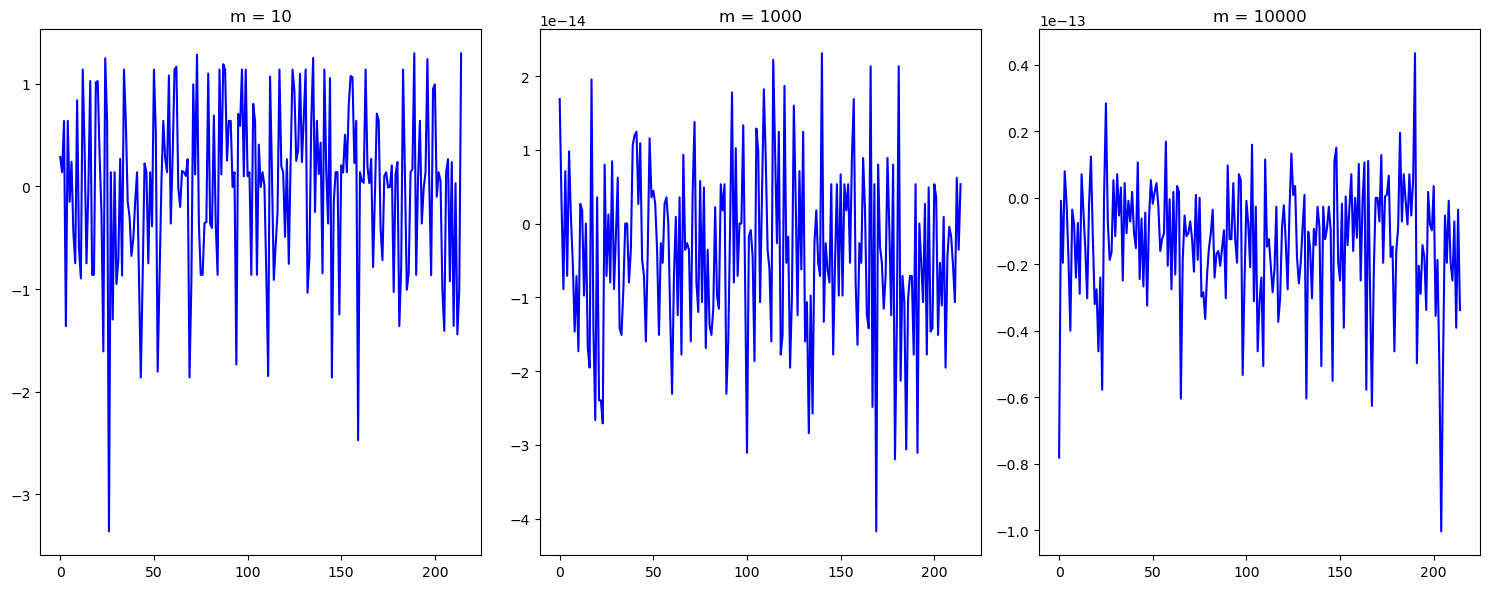

In [101]:
m_s = [10, 1000, 10000]
formulas = []
RSSs = []

# Create a new figure
fig, axs = plt.subplots(1,len(m_s), figsize=(15,  6))

for i, m in enumerate(m_s):
    X = create_X(df, m)
    coef = linear_regression(X, y)
    formulas.append(regression_formula(coef))
    RSSs.append(plot_error(coef, X, y, axs[i]))
    axs[i].set_title(f"m = {m}")

plt.tight_layout()
plt.show()


In [102]:
print("Print RSS")
for rse in RSSs:
    print(rse)
print("Print formulas")
for formula in formulas:
    print(formula)

Print RSS
141.31491074883564
3.24389095209646e-26
1.1571722965191664e-25
Print formulas
y = -0.02831255692348957*x1 + -0.005734524652491018*x2 + 0.025794973427745456*x3 + 0.0995093461529706*x4 + -0.03156859426224943*x5 + -0.036787666746577526*x6 + 0.03878138353216899*x7 + 0.1572472988748761*x8 + 0.03718476375613636*x9 + 0.03591995391637961*x10 + 3.861540057703706
y = -0.17671155495704535*x1 + -0.016356088292107857*x2 + 0.017687256001502283*x3 + 0.060927744081207574*x4 + -0.07106869168579494*x5 + -0.02271128022601511*x6 + 0.052068032694658775*x7 + 0.06093606113760872*x8 + 0.10252980139369612*x9 + -0.0021880044106889346*x10 + -0.02521172176511089*x11 + 0.20073197893484476*x12 + -0.07428765486249929*x13 + -0.06966534174689318*x14 + 0.029211091247818288*x15 + 0.09485173722719503*x16 + 0.11699432025097434*x17 + -0.07107561540948701*x18 + 0.05649931855273813*x19 + -0.06475321707525498*x20 + -0.024514471933004114*x21 + 0.07292764767838555*x22 + -5.9161033640472635e-05*x23 + -0.072010961541272

# Podpunkt B

m = 10
Test y = 5.0 Pred y = 3.921403211811019
Test y = 4.0 Pred y = 4.1092992714523975
Test y = 4.0 Pred y = 3.8543512544150955
Test y = 4.0 Pred y = 3.923052712912445
Test y = 3.0 Pred y = 4.049327518689547
Test y = 2.5 Pred y = 4.808877453810604
Test y = 4.0 Pred y = 3.8543512544150955
Test y = 4.0 Pred y = 3.691427083080452
Test y = 3.0 Pred y = 4.001825268918942
Test y = 4.0 Pred y = 3.801525940747401
Test y = 2.5 Pred y = 3.869403567641296
Test y = 4.0 Pred y = 3.9046402224620382
Test y = 2.5 Pred y = 4.011488838964941
Test y = 3.0 Pred y = 4.05614816509495
Test y = 5.0 Pred y = 3.6506960402467907
m = 100
Test y = 5.0 Pred y = 5.022900928487486
Test y = 4.0 Pred y = 4.64900495333111
Test y = 4.0 Pred y = 5.007728095700891
Test y = 4.0 Pred y = 3.7200256136749514
Test y = 3.0 Pred y = 2.2365212079999885
Test y = 2.5 Pred y = 4.562438171148891
Test y = 4.0 Pred y = 3.790635529677552
Test y = 4.0 Pred y = 0.8044164166771292
Test y = 3.0 Pred y = 10.324451534104671
Test y = 4.0 Pred 

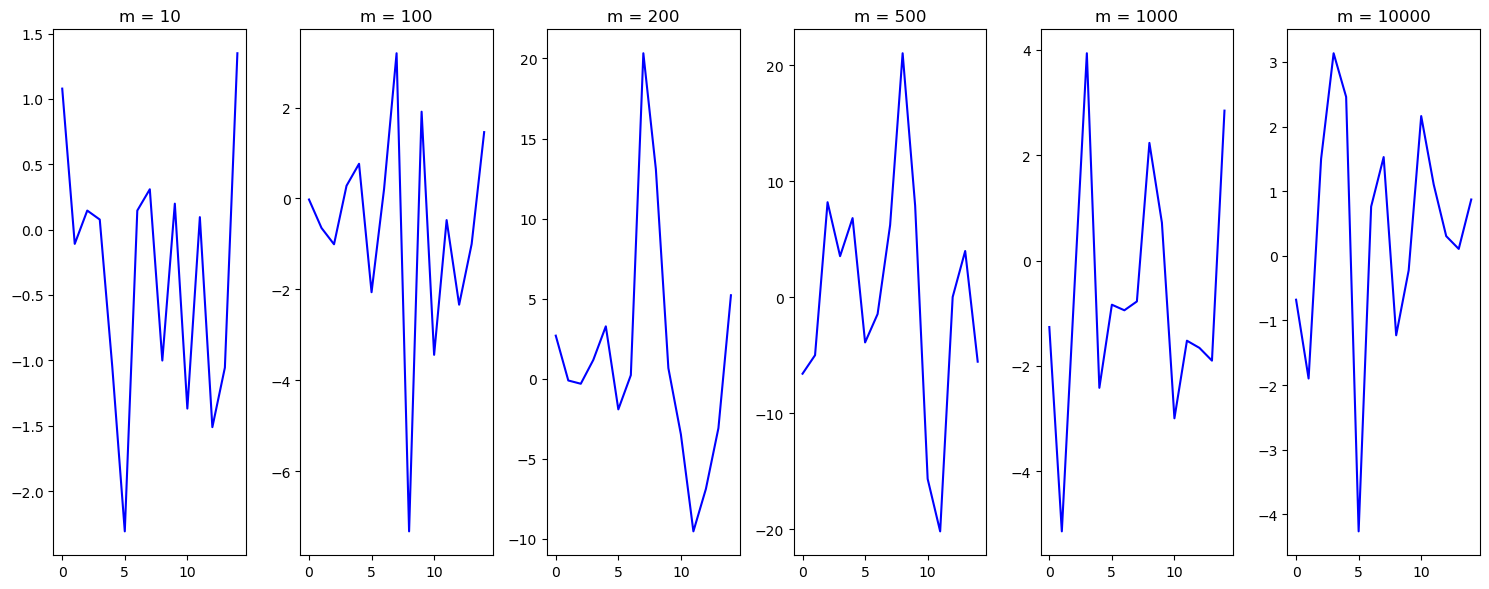

In [103]:
# Na istniejacym juz podwykresie rysujemy "blad"  - dla ladniejszej wizualizacji
# tym razem na podstawie predykcji
def plot_error_v2(coef, X_test, y_test, ax,m):
    y_pred = predict(coef, X_test)
    residuals = y_test - y_pred
    print(f"m = {m}")
    for i in range(len(residuals)):
            print(f"Test y = {y_test[i]} Pred y = {y_pred[i]}")
    ax.plot(range(len(y_test)), residuals, color='blue')
    # Dodatkowo zwracam Residual Sum of Squares
    return sum(residuals ** 2)


m_s = [10, 100, 200, 500, 1000, 10000]
formulas = []
RSSs = []

fig, axs = plt.subplots(1,6, figsize=(15,  6))

for i, m in enumerate(m_s):
    X = create_X(df, m)
    X_train, X_test = X[:200,:], X[200:,:]
    y_train, y_test = y[:200], y[200:]
    coef = linear_regression(X_train, y_train)
    formulas.append(regression_formula(coef))
    RSSs.append(plot_error_v2(coef, X_test, y_test, axs[i],m))
    axs[i].set_title(f"m = {m}")

plt.tight_layout()
plt.show()



In [104]:
print("Print RSS")
for rse in RSSs:
    print(rse)

Print RSS
15.898960017289216
94.56517771187323
795.32628340356
1455.3881585093857
83.12288379942689
51.59335432757075
